# AI Programming Foundations Project

Name: **Sabrina Palis**

Dataset: NASA Meteorite Landings Dataset (Kaggle)

This project builds a reproducible data workflow for cleaning, exploring, and visualizing meteorite landing records. The dataset serves as a proxy for noisy aerospace observation logs, allowing us to demonstrate data hygiene, anomaly handling, and structured exploratory analysis. The workflow is designed as a professional foundation for future AI and machine learning pipelines.



## Data ingestion and initial exploration

### Environment Setup
This notebook is designed to run locally or in Colab.
Dataset is loaded relative to the project directory.

In [ ]:
# Optional: Google Colab setup
# Uncomment only if running in Google Colab and using Google Drive storage
# Mount drive
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Go to directory
#%cd /content/drive/MyDrive/Capstone/ai-programming-foundations-project/

/content/drive/MyDrive/Capstone/ai-programming-foundations-project


In [ ]:
DATA_PATH = "data/meteorite-landings.csv"

## Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings (readable defaults)
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_theme()

# Reproducibility (for any random sampling we might do)
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## Data Ingestion

In [ ]:
DATA_PATH = "data/meteorite-landings.csv"

df_raw = pd.read_csv(DATA_PATH)
df_raw.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
df_raw.shape, df_raw.columns

((45716, 10),
 Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
        'reclong', 'GeoLocation'],
       dtype='object'))

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [ ]:
df_raw.isna().sum().sort_values(ascending=False)

,0
GeoLocation,7315
reclong,7315
reclat,7315
year,288
mass,131
name,0
id,0
fall,0
nametype,0
recclass,0


We have 45,716 meteorites.

The problems we immediately see:

Missing data

* 7,315 missing latitude
* 7,315 missing longitude
* 7,315 missing GeoLocation
* 288 missing year
* 131 missing mass

This dataset contains incomplete observation records that require structured cleaning

#Implement cleaning functions

## Data Cleaning

In [ ]:
df = df_raw.copy()

#### Cleaning function to remove invalid coordinates

In [ ]:
def remove_missing_coordinates(dataframe):
    """
    Remove rows where geographic coordinates are missing.

    Meteorite records without latitude or longitude cannot be used
    for spatial analysis and represent incomplete observation logs.

    Parameters
    ----------
    dataframe : pandas.DataFrame
        Input meteorite dataset.

    Returns
    -------
    pandas.DataFrame
        Cleaned dataset with valid coordinates only.
    """
    cleaned = dataframe.dropna(subset=["reclat", "reclong"])
    return cleaned

In [ ]:
df = remove_missing_coordinates(df)
df.shape

(38401, 10)

We removed 7,315 records, exactly the number of missing coordinates we saw earlier.

#### Cleaning function to fix invalid years
The dataset notes said that  years before 860 or after 2016 are corrupted. So we filter them out.

In [ ]:
def filter_invalid_years(dataframe, min_year=860, max_year=2016):
    """
    Remove meteorite records with invalid year values.

    The dataset documentation states that years outside the range
    860–2016 are likely parsing errors and should be excluded.

    Parameters
    ----------
    dataframe : pandas.DataFrame
        Input meteorite dataset.
    min_year : int
        Minimum valid year.
    max_year : int
        Maximum valid year.

    Returns
    -------
    pandas.DataFrame
        Dataset with valid years only.
    """
    cleaned = dataframe[(dataframe["year"] >= min_year) &
                        (dataframe["year"] <= max_year)]
    return cleaned

In [ ]:
df = filter_invalid_years(df)
df.shape

(38222, 10)

We removed 179 more invalid records.

### Cleaning Rationale

The raw dataset contains incomplete and corrupted observation records.
Rows with missing geographic coordinates were removed because spatial
analysis requires valid latitude and longitude values.

Additionally, meteorite records with years outside the documented valid
range (860–2016) were excluded. The dataset documentation indicates
that these values are likely parsing errors. Removing them improves
data reliability and ensures consistent temporal analysis.

After cleaning, the dataset contains 38,222 valid meteorite records.

# Add EDA functions and visualizations

## Exploratory Data Analysis

##### Function to summarize dataset

In [ ]:
def summarize_dataset(dataframe):
    """
    Generate summary statistics for numeric columns.

    Parameters
    ----------
    dataframe : pandas.DataFrame

    Returns
    -------
    pandas.DataFrame
        Summary statistics.
    """
    return dataframe.describe()

In [ ]:
summarize_dataset(df)

,id,mass,year,reclat,reclong
count,38222.000000,3.811400e+04,38222.000000,38222.000000,38222.000000
mean,25347.452540,1.560111e+04,1989.825467,-39.386068,61.203201
std,17391.738721,6.286900e+05,26.703496,46.314173,80.756432
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,10844.500000,6.630000e+00,1986.000000,-76.716670,0.000000
50%,21734.500000,2.908500e+01,1996.000000,-71.500000,35.666670
75%,39905.750000,1.873350e+02,2002.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2013.000000,81.166670,354.473330


##### Function to count meteorites by fall type

In [ ]:
def count_by_fall_type(dataframe):
    """
    Count meteorites by fall observation type.

    Parameters
    ----------
    dataframe : pandas.DataFrame

    Returns
    -------
    pandas.Series
        Counts of meteorites categorized as 'Fell' or 'Found'.
    """
    return dataframe["fall"].value_counts()

In [ ]:
count_by_fall_type(df)

,count
fall,
Found,37125
Fell,1097


#### Function for returning the most common meteorite classes.

In [ ]:
def top_meteorite_classes(dataframe, n=10):
    """
    Return the most common meteorite classes.

    Parameters
    ----------
    dataframe : pandas.DataFrame
    n : int
        Number of top classes to return.

    Returns
    -------
    pandas.Series
        Top meteorite classes by frequency.
    """
    return dataframe["recclass"].value_counts().head(n)

In [ ]:
top_meteorite_classes(df)

,count
recclass,
L6,7525
H5,6247
H6,3898
H4,3880
L5,3266
LL5,2199
LL6,1660
L4,939
H4/5,395


### Exploratory Observations

The cleaned dataset contains 38,222 meteorite records with valid spatial
and temporal information. The summary statistics show that meteorite mass
is extremely skewed: most recovered fragments are small, while a few rare
events account for very large masses. This long-tail distribution is typical
of fragmentation processes during atmospheric entry.

The majority of meteorites were discovered after landing (37,125) rather
than observed falling (1,097). This suggests a strong observational bias,
where recovery depends more on human detection and search efforts than on
direct witnessed impact events.

Meteorite classifications are highly concentrated in a few dominant classes.
The most common classes (such as L6 and H5) account for a large proportion
of the dataset, indicating recurring material compositions among recovered
meteorites.

## Visualizations

### Visualization 1: Fell vs Found (bias)

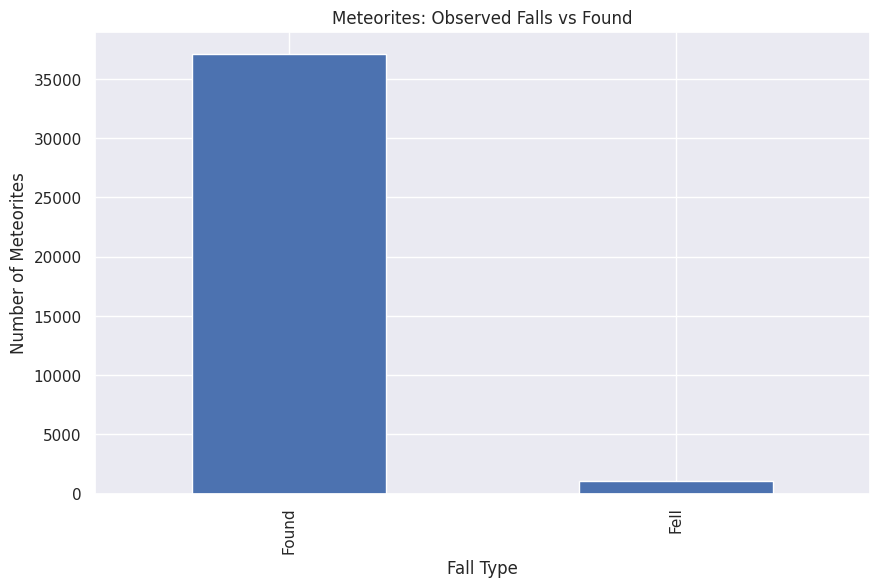

In [ ]:
fall_counts = count_by_fall_type(df)

fall_counts.plot(kind="bar")
plt.title("Meteorites: Observed Falls vs Found")
plt.xlabel("Fall Type")
plt.ylabel("Number of Meteorites")
plt.show()

Most meteorites were discovered after landing rather than observed falling.
This reflects a strong detection bias: meteorite recovery depends heavily on
human presence and search effort rather than direct observation.

### Visualization 2: Top meteorite classes

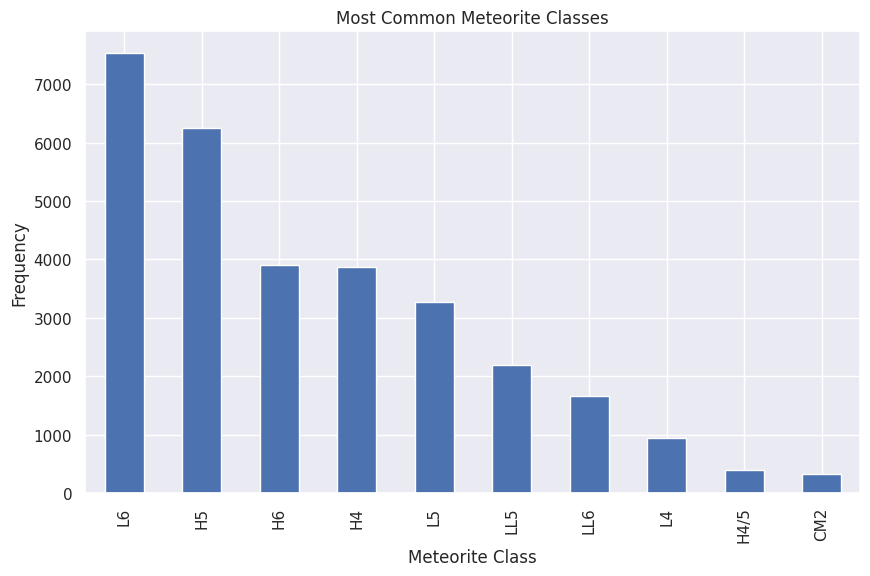

In [ ]:
top_classes = top_meteorite_classes(df)

top_classes.plot(kind="bar")
plt.title("Most Common Meteorite Classes")
plt.xlabel("Meteorite Class")
plt.ylabel("Frequency")
plt.show()

A small number of meteorite classes dominate the dataset. This suggests
recurring material compositions among recovered meteorites and highlights
how classification is unevenly distributed.

### Visualization 3: Mass distribution (physics)

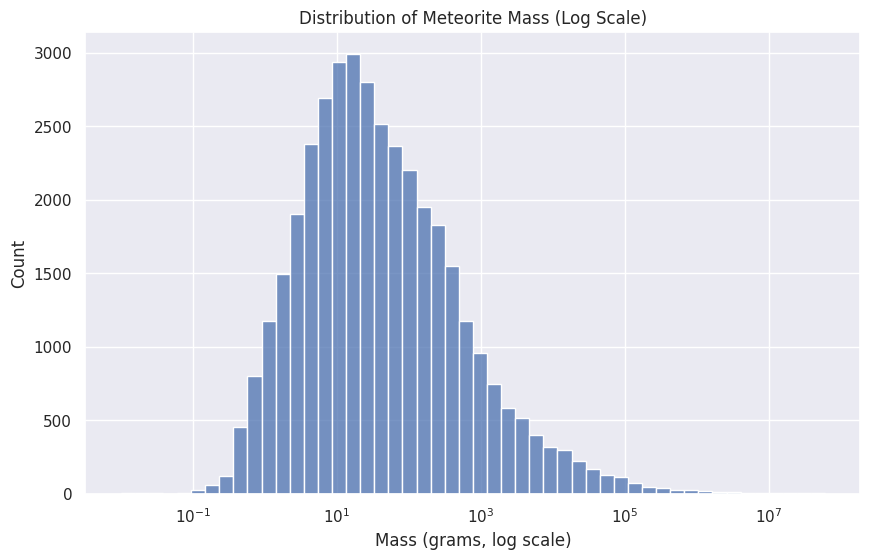

In [ ]:
sns.histplot(df["mass"], bins=50, log_scale=True)
plt.title("Distribution of Meteorite Mass (Log Scale)")
plt.xlabel("Mass (grams, log scale)")
plt.ylabel("Count")
plt.show()

Meteorite mass follows a long-tail distribution: many small fragments and
a few extremely large impacts. Log scaling reveals the structure of this
skewed distribution more clearly.

### Visualization 4: Discoveries over time

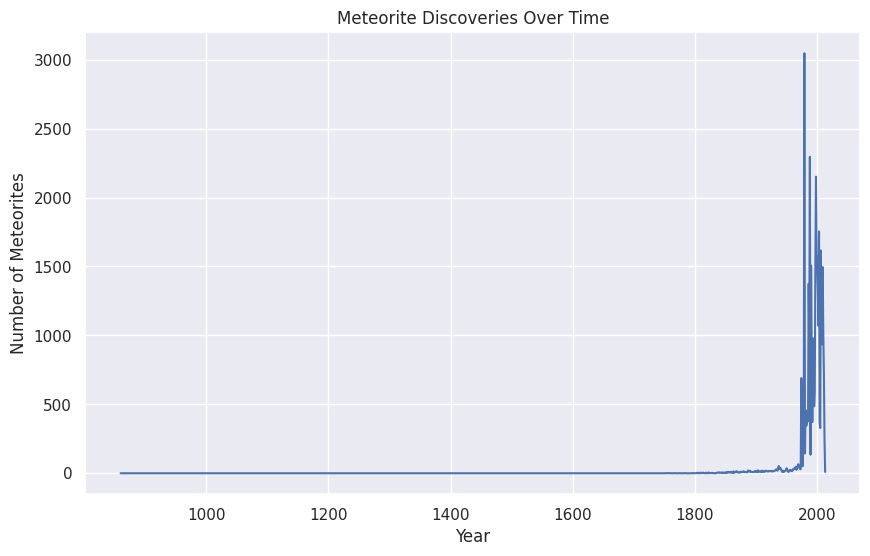

In [ ]:
df["year"].value_counts().sort_index().plot()
plt.title("Meteorite Discoveries Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Meteorites")
plt.show()

Meteorite discoveries increase dramatically in recent decades. This likely
reflects improved search methods, scientific interest, and global recording
systems rather than a true increase in impact frequency.

### Visualization 5: Geographic scatter

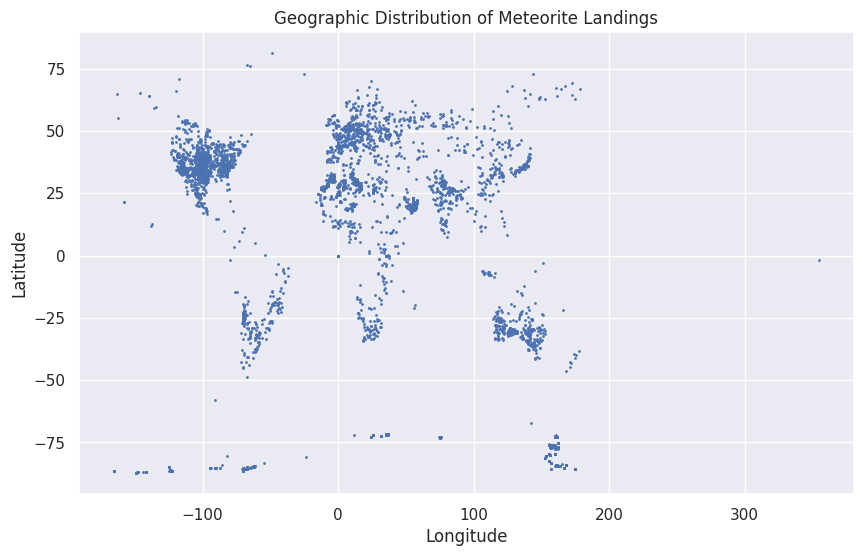

In [ ]:
plt.scatter(df["reclong"], df["reclat"], s=1)
plt.title("Geographic Distribution of Meteorite Landings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Meteorite recovery is geographically uneven. Dense clusters likely reflect
human accessibility and research activity rather than true impact density.

## Summary & Interpretation

This project transformed a raw meteorite landing dataset into a clean,
analyzable workflow suitable for exploratory study. After removing records
with missing coordinates and invalid year values, the cleaned dataset
contained 38,222 meteorites with reliable spatial and temporal information.

Several patterns emerged during analysis. First, the overwhelming majority
of meteorites were discovered after landing rather than observed falling.
This indicates a strong detection bias: human recovery efforts shape the
dataset more than witnessed impact events. Second, a small number of
meteorite classes dominate the records, suggesting recurring material
compositions among recovered samples. Third, meteorite mass follows a
highly skewed distribution, with many small fragments and a few rare,
extremely large events.

The dataset also shows a dramatic increase in discoveries in recent
decades. This trend likely reflects improvements in scientific search
methods and global reporting infrastructure rather than a true increase in
impact frequency.

This analysis assumes that cleaned records accurately represent recoverable
meteorites, but the dataset is influenced by geographic accessibility,
human population density, and research focus. Regions that are difficult to
access are likely underrepresented. Future work could integrate population
and terrain data to better model detection bias and improve interpretation.

## References



NASA Meteorite Landings Dataset (Kaggle)
https://www.kaggle.com/datasets/nasa/meteorite-landings

In [ ]:
# Create requirements.txt
!pip freeze > requirements.txt